# Test RXTE Data

Let's test some RXTE spectra. The RXTE data has a response file that's both combined in one, so I don't know what that'll look like:

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

try:
    import seaborn as sns
except ImportError:
    print("Seaborn not installed. Oh well.")
    
import numpy as np

import astropy.io.fits as fits
import sherpa.astro.ui as ui

from clarsach.respond import RMF, ARF

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


Let's first load the data and have a look at it:

In [2]:
datadir = "../data/RXTE/"
data_file = "cor_rbs.sh1743_d3444_b.2.pha"
resp_file = "p2_xe_2003-06-18.rsp"

In [54]:
ui.load_data("1", datadir+data_file, use_errors=True)

detchans: 129
self._lo.shape: 300
e_min.shape: 129
read RMF file ../data/RXTE/p2_xe_2003-06-18.rsp


Now we can get the data and the rmf out of the sherpa objects:

In [96]:
d = ui.get_data("1")
arf_sherpa = d.get_arf()
rmf_sherpa = d.get_rmf()

Let's make a test rmf by applying it to a constant model with $c=1$:

In [98]:
m = np.ones_like(rmf_sherpa.energ_lo)
m_rmf_sherpa = rmf_sherpa.apply_rmf(m)

size(src): 300
folded model size: 129


What does the spectrum (i.e. the data) look like?

<IPython.core.display.Javascript object>


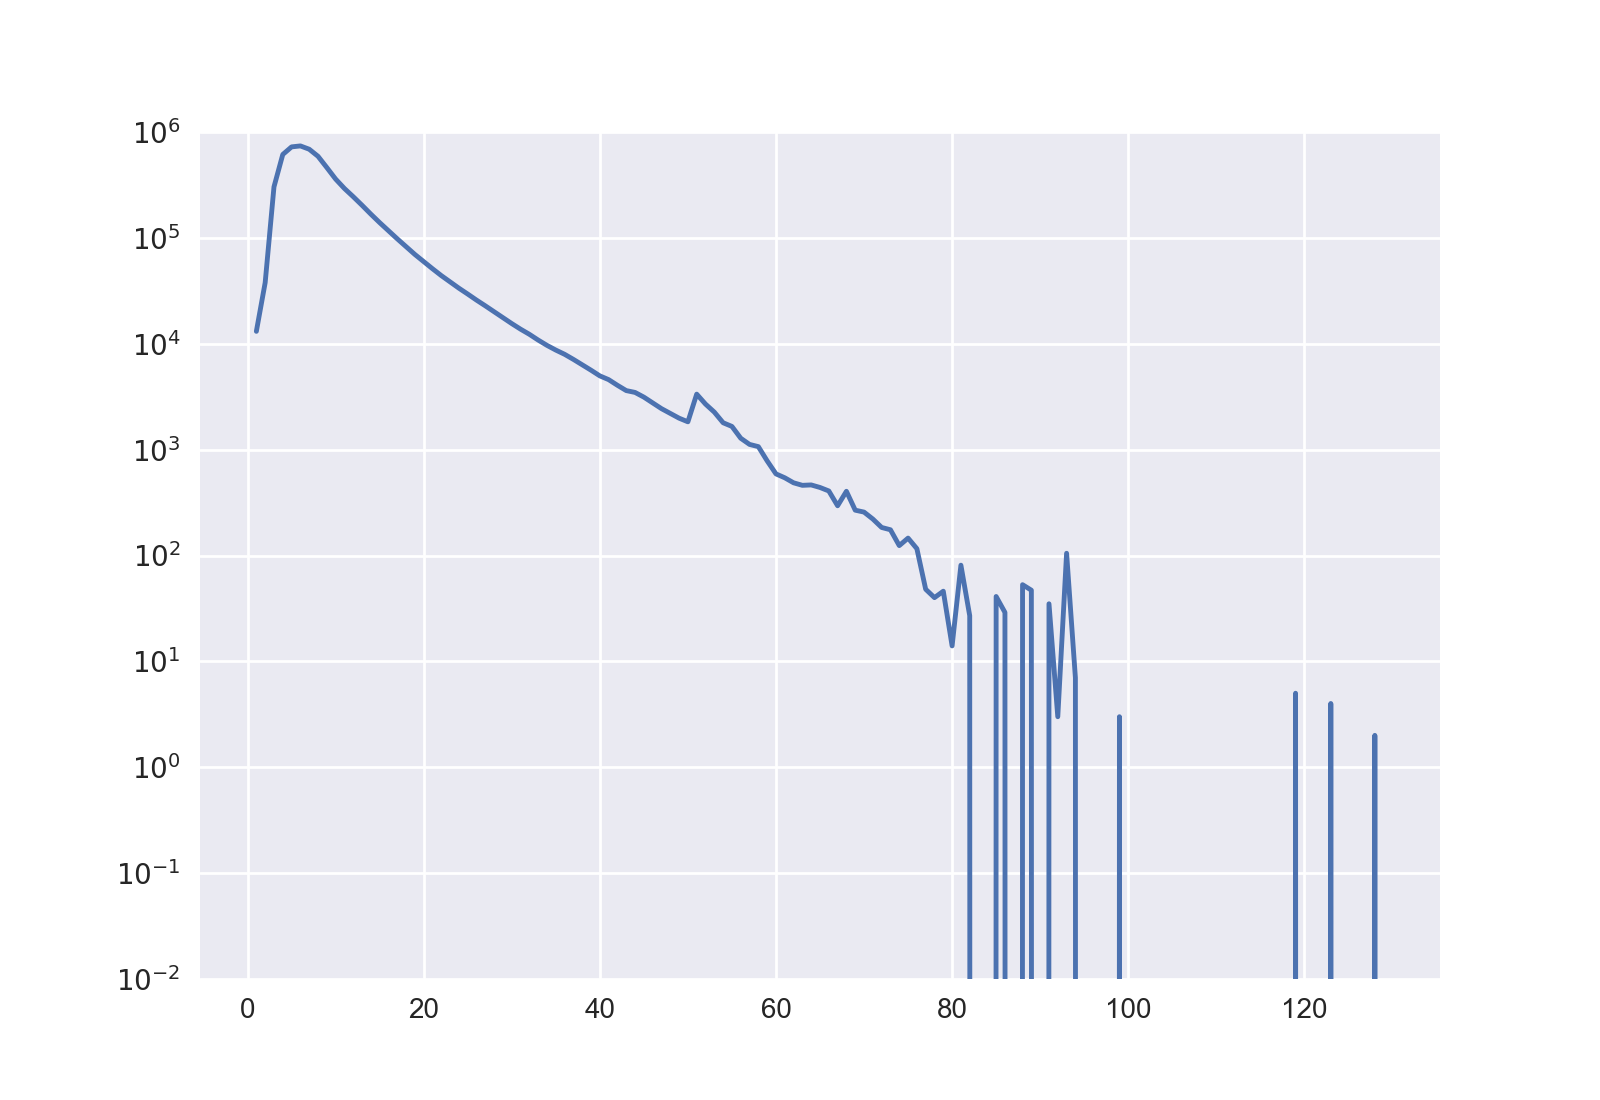

(0.01, 1000000.0)

In [99]:
plt.figure()
plt.plot(d.channel, d.counts)
plt.yscale("log")
plt.ylim(1e-2, 1e6)

What does the RMF look like?

<IPython.core.display.Javascript object>


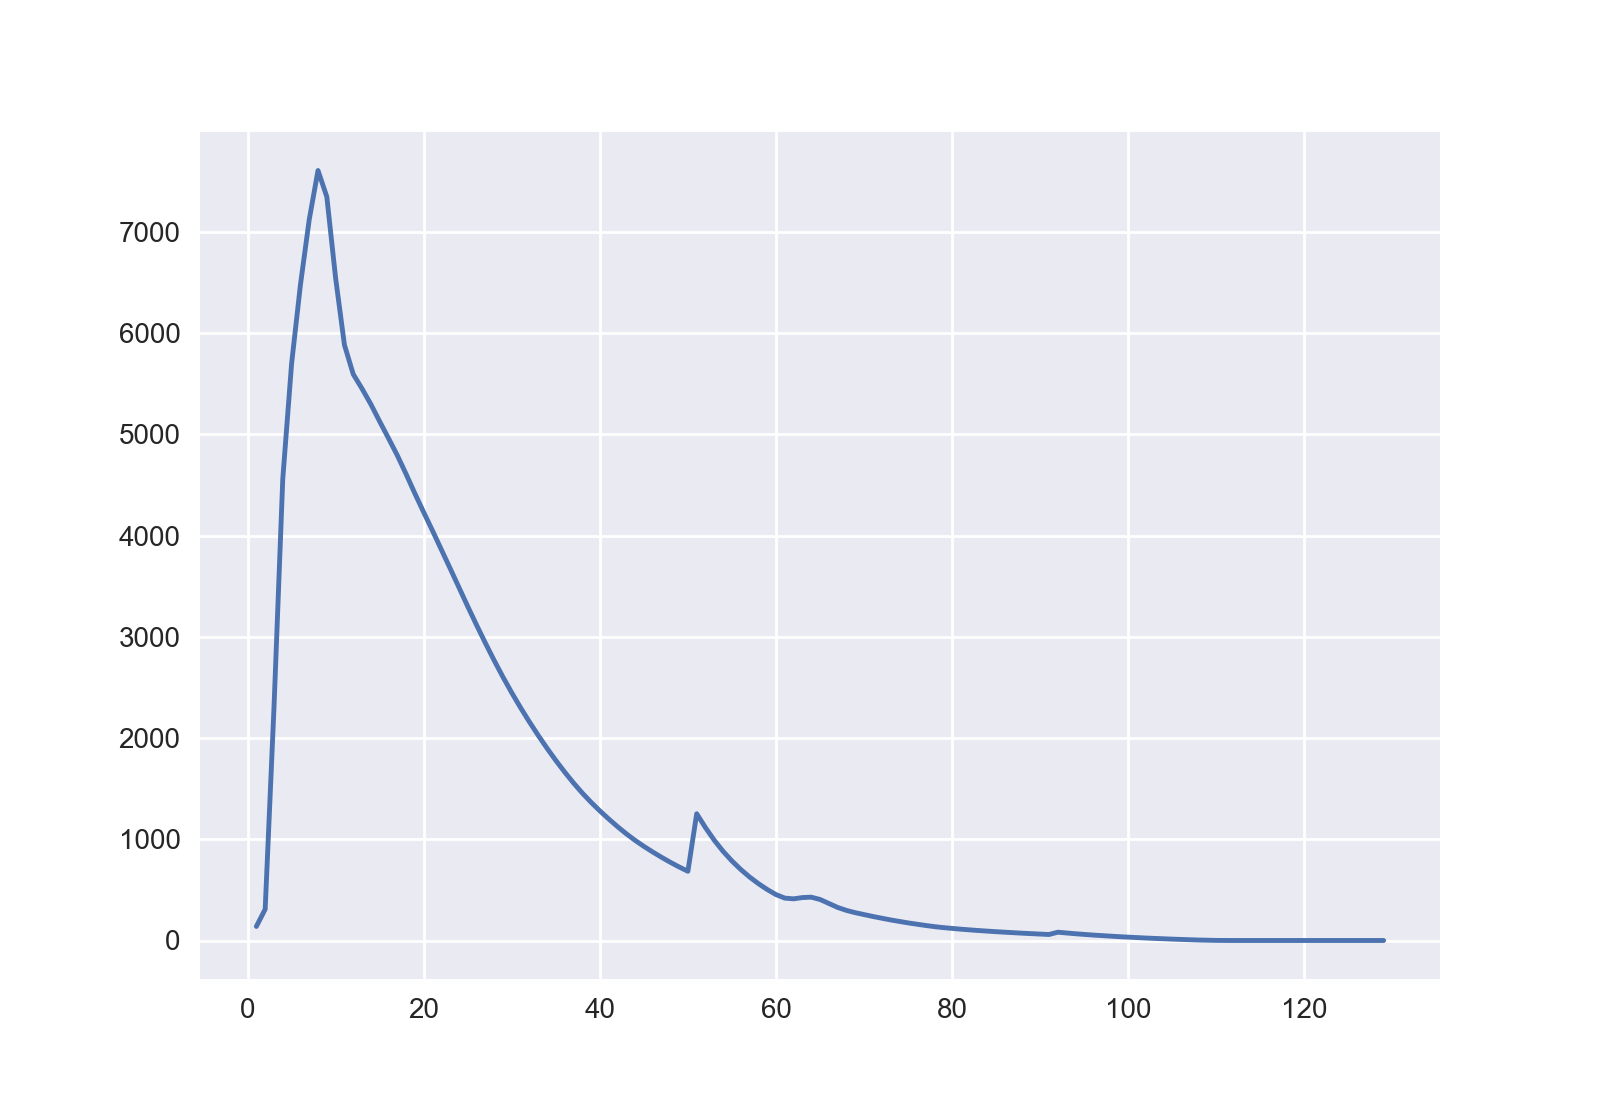

In [100]:
plt.figure()
plt.plot(d.channel, m_rmf_sherpa)


Let's also use sherpa to make a deconvolved spectrum:

In [101]:
ui.set_source("1", ui.polynom1d.truespec)
c_deconv = ui.get_ratio_plot("1").y
e_deconv = ui.get_ratio_plot("1").x


size(src): 300
folded model size: 129
size(src): 300
folded model size: 129


Let's plot the deconvolved spectrum:

<IPython.core.display.Javascript object>


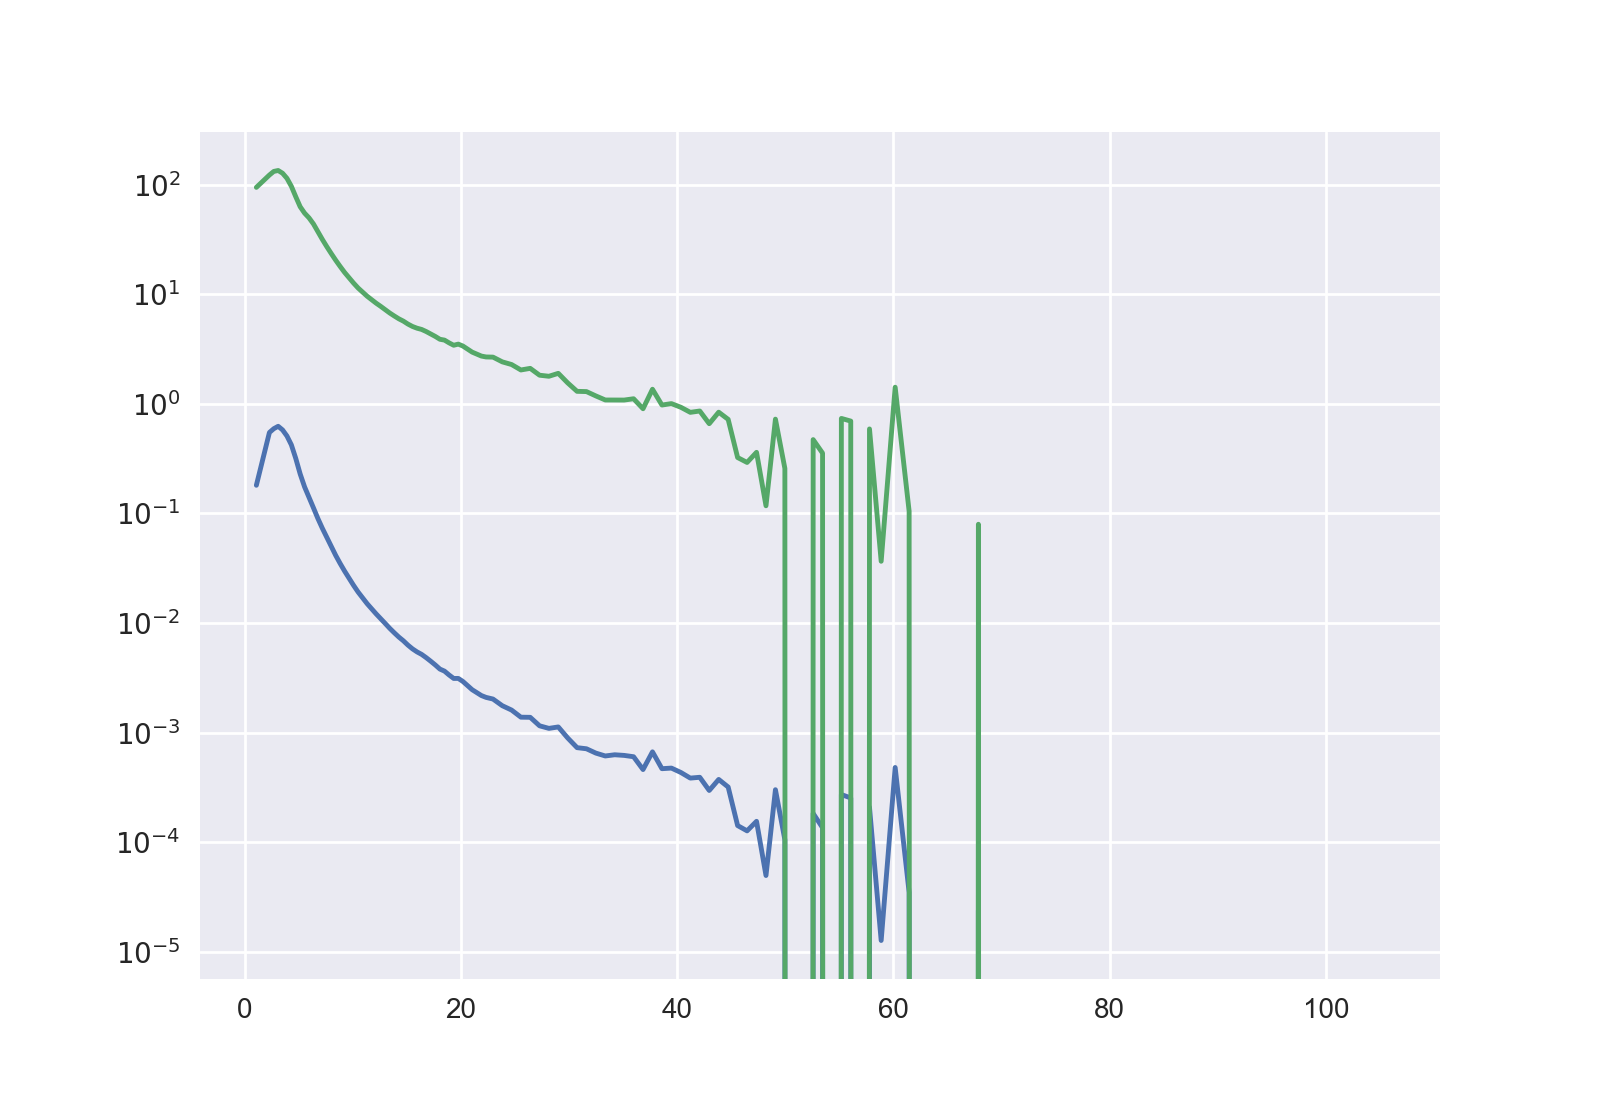

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


In [65]:
plt.figure()
plt.plot(e_deconv, c_deconv)
plt.plot(e_deconv, d.counts/m_rmf_sherpa)
plt.yscale("log")

Let's now load the data from a fits file:

In [66]:
hdulist = fits.open(datadir+data_file)

In [67]:
hdulist.info()

Filename: ../data/RXTE/cor_rbs.sh1743_d3444_b.2.pha
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      12   ()      
  1  SPECTRUM    BinTableHDU     78   129R x 5C   [J, J, E, E, I]   


In [68]:
s = hdulist["SPECTRUM"]

In [69]:
s.columns

ColDefs(
    name = 'CHANNEL'; format = 'J'
    name = 'COUNTS'; format = 'J'; unit = 'count'
    name = 'STAT_ERR'; format = 'E'; unit = 'count'
    name = 'SYS_ERR'; format = 'E'
    name = 'QUALITY'; format = 'I'
)

In [70]:
channel = s.data.field("CHANNEL")
counts = s.data.field("COUNTS")

In [71]:
channel

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128], dtype=int32)

<IPython.core.display.Javascript object>


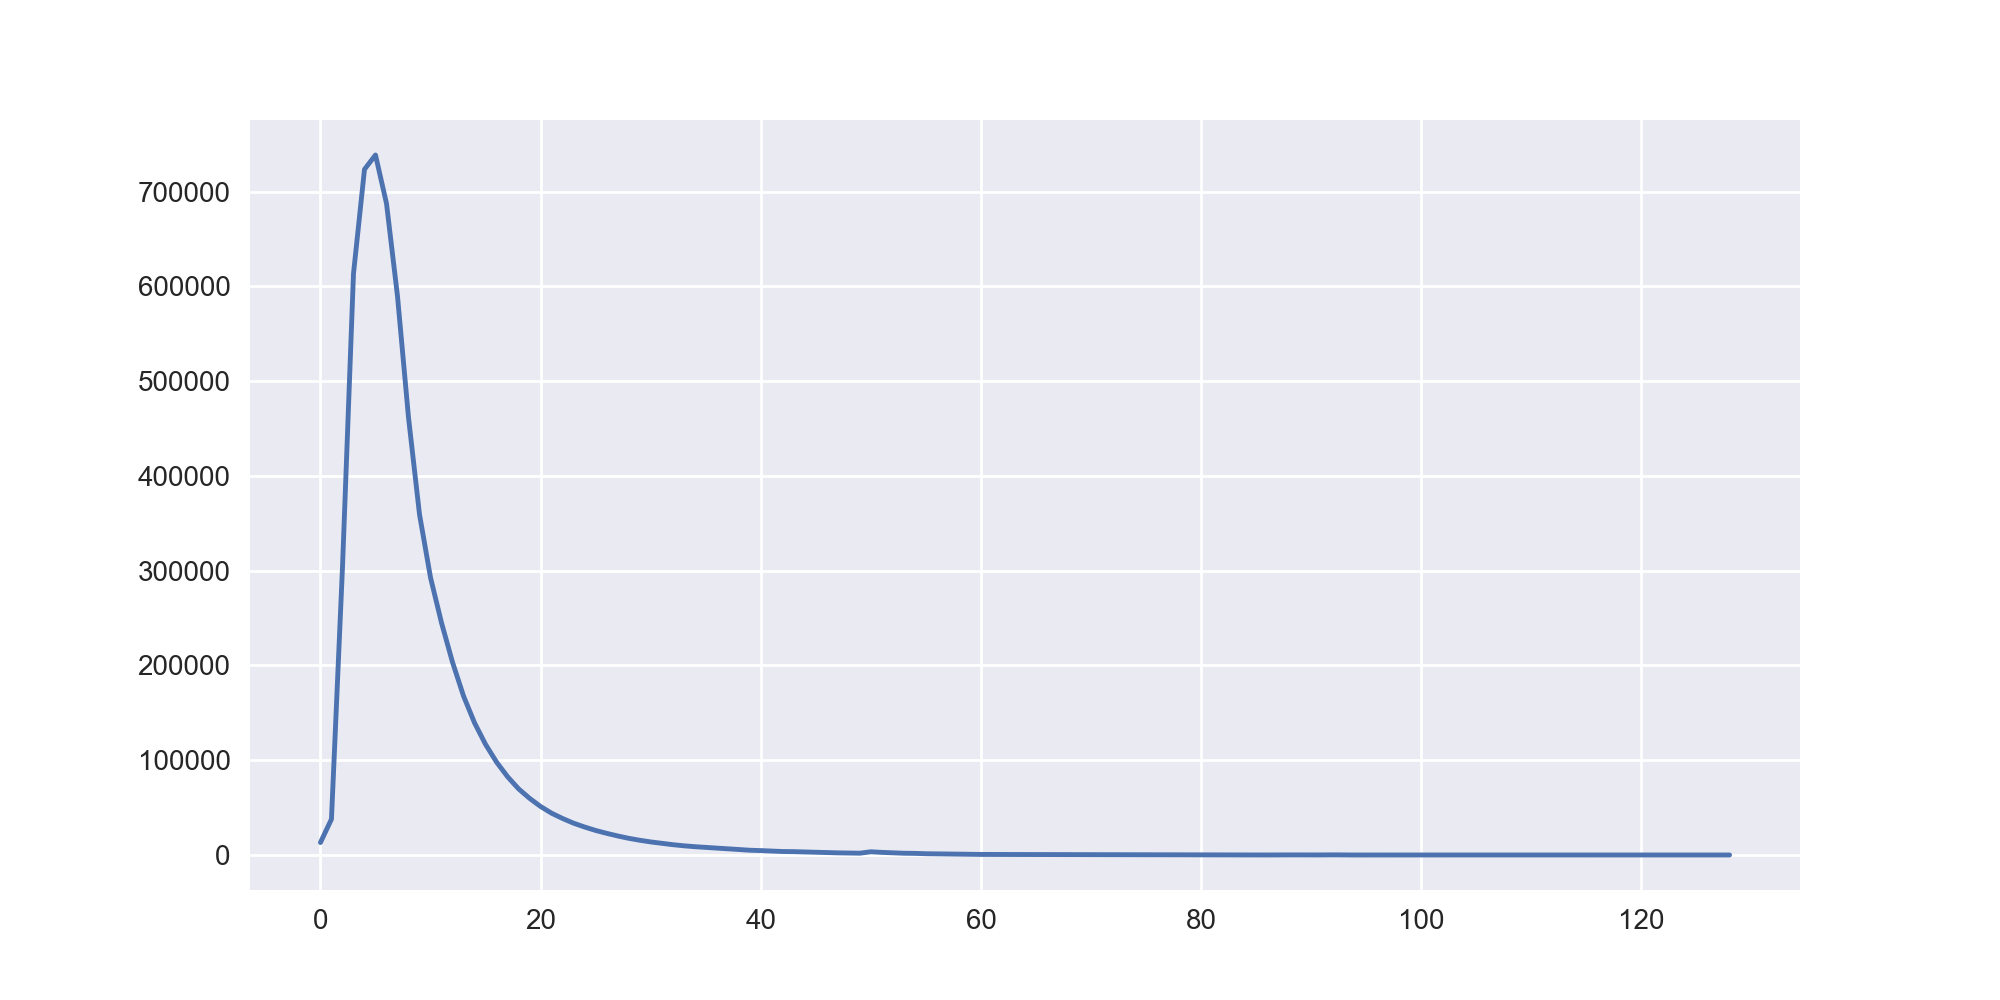

In [73]:
plt.figure(figsize=(10,5))
plt.plot(channel, counts)

We'll do the same with the response:

In [74]:
rsp = fits.open(datadir+resp_file)

In [75]:
rsp[0].name

'PRIMARY'

In [76]:
rsp.info()

Filename: ../data/RXTE/p2_xe_2003-06-18.rsp
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      66   ()      
  1  SPECRESP MATRIX  BinTableHDU    121   300R x 6C   [E, E, I, 3I, 3I, PE(72)]   
  2  EBOUNDS     BinTableHDU    113   129R x 3C   [J, E, E]   


In [77]:
rsp[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   30 / width of table in bytes                        
NAXIS2  =                  300 / number of rows in table                        
PCOUNT  =                31860 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
TTYPE1  = 'ENERG_LO'           / label for field   1                            
TFORM1  = 'E       '           / data format of field: 4-byte REAL              
TUNIT1  = 'keV     '           / physical unit of field                         
TTYPE2  = 'ENERG_HI'           / label for field   2                            
TFORM2  = 'E       '        

The `ebounds` extension will be useful, I bet:

In [78]:
ebounds = rsp["EBOUNDS"]

In [79]:
ebounds.columns

ColDefs(
    name = 'CHANNEL'; format = 'J'
    name = 'E_MIN'; format = 'E'; unit = 'keV'
    name = 'E_MAX'; format = 'E'; unit = 'keV'
)

In [80]:
e_min = ebounds.data.field("E_MIN")
e_max = ebounds.data.field("E_MAX")

In [82]:
print(e_min[0])
print(e_min[-1])

0.074712
104.246


So those are the energy bins corresponding to the data.

The response is in an extension called `SPECRESP MATRIX`, which is different from those we saw in Chandra and Athena:

In [83]:
s = rsp["SPECRESP MATRIX"]

In [84]:
c = s.columns

In [85]:
c

ColDefs(
    name = 'ENERG_LO'; format = 'E'; unit = 'keV'
    name = 'ENERG_HI'; format = 'E'; unit = 'keV'
    name = 'N_GRP'; format = 'I'
    name = 'F_CHAN'; format = '3I'
    name = 'N_CHAN'; format = '3I'
    name = 'MATRIX'; format = 'PE(72)'
)

In [86]:
e_low = s.data.field("ENERG_LO")
e_hi = s.data.field("ENERG_HI")
e_mid = e_low + (e_hi-e_low)/2.

In [87]:
n_grp = s.data.field("N_GRP")

### Applying an RXTE RMF

Let's see if I can reproduce the sherpa RMF from above.

First, let's use the original function we used in `ResponsesTest.ipynb`:

In [115]:
def rmf_fold(spec, rmf):
    
    #current_num_groups = 0
    #current_num_chans = 0
    
    nchannels = len(spec)
    
    resp_idx = 0
    first_chan_idx = 0
    num_chans_idx =0
    counts_idx = 0
    
    counts = np.zeros(nchannels)
    
    for i in range(nchannels):
        source_bin_i = spec[i]
        current_num_groups = rmf.n_grp[i]
        
        while current_num_groups:
            counts_idx = int(rmf.f_chan[first_chan_idx] - rmf.offset)
            current_num_chans = rmf.n_chan[num_chans_idx]
            
            first_chan_idx += 1
            num_chans_idx +=1 
            
            while current_num_chans:
                counts[counts_idx] += rmf.matrix[resp_idx] * source_bin_i
                counts_idx += 1
                resp_idx += 1
                current_num_chans -= 1
            
            current_num_groups -= 1
            
    return counts


In [123]:
padded_model = np.zeros_like(rmf_sherpa.energ_lo)
padded_model[:len(d.counts)] = 1.0

m_rmf_old = rmf_fold(padded_model, rmf_sherpa)

In [124]:
m_rmf_old[:10]

array([  104.40457204,   290.82903508,  2185.9853099 ,  4404.64592749,
        5549.01627741,  6352.33622996,  7003.13490048,  7392.7840752 ,
        7027.35346118,  6222.29343639])

In [125]:
m_rmf_sherpa[:10]

array([  138.8271669 ,   308.91562093,  2298.59260613,  4562.09728653,
        5698.60650433,  6475.19314552,  7120.91480154,  7607.46298349,
        7347.6803408 ,  6543.79370319])

In [121]:
print(len(m_rmf_old))
print(len(m_rmf_sherpa))

300
129


In [122]:
np.allclose(m_rmf_sherpa, m_rmf_old[:len(m_rmf_sherpa)])

True

In [111]:
rmf = RMF(datadir+resp_file)

In [89]:
ebounds = rsp["EBOUNDS"]

In [90]:
ebounds.columns

ColDefs(
    name = 'CHANNEL'; format = 'J'
    name = 'E_MIN'; format = 'E'; unit = 'keV'
    name = 'E_MAX'; format = 'E'; unit = 'keV'
)

Let's try to deconvolve the spectrum:

In [91]:
rmf = RMF(datadir+resp_file)

In [92]:
bkg_model = np.ones_like(counts)
m_rmf = rmf.apply_rmf(bkg_model)

I am in channel 0
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 1
I am in channel 1
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 0
I am in channel 2
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 0
I am in channel 3
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 1
I am in channel 4
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 0
I am in channel 5
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 0
I am in channel 6
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 1
I am in channel 7
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 0
I am in channel 8
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 0
I am in channel 9
current_num_groups: 1
I am in num_group 0
counts_idx: 0
current_num_chans: 1
I am in channel 10
current_num_groups: 1
I am in n

In [93]:
len(m_rmf)

129

<IPython.core.display.Javascript object>


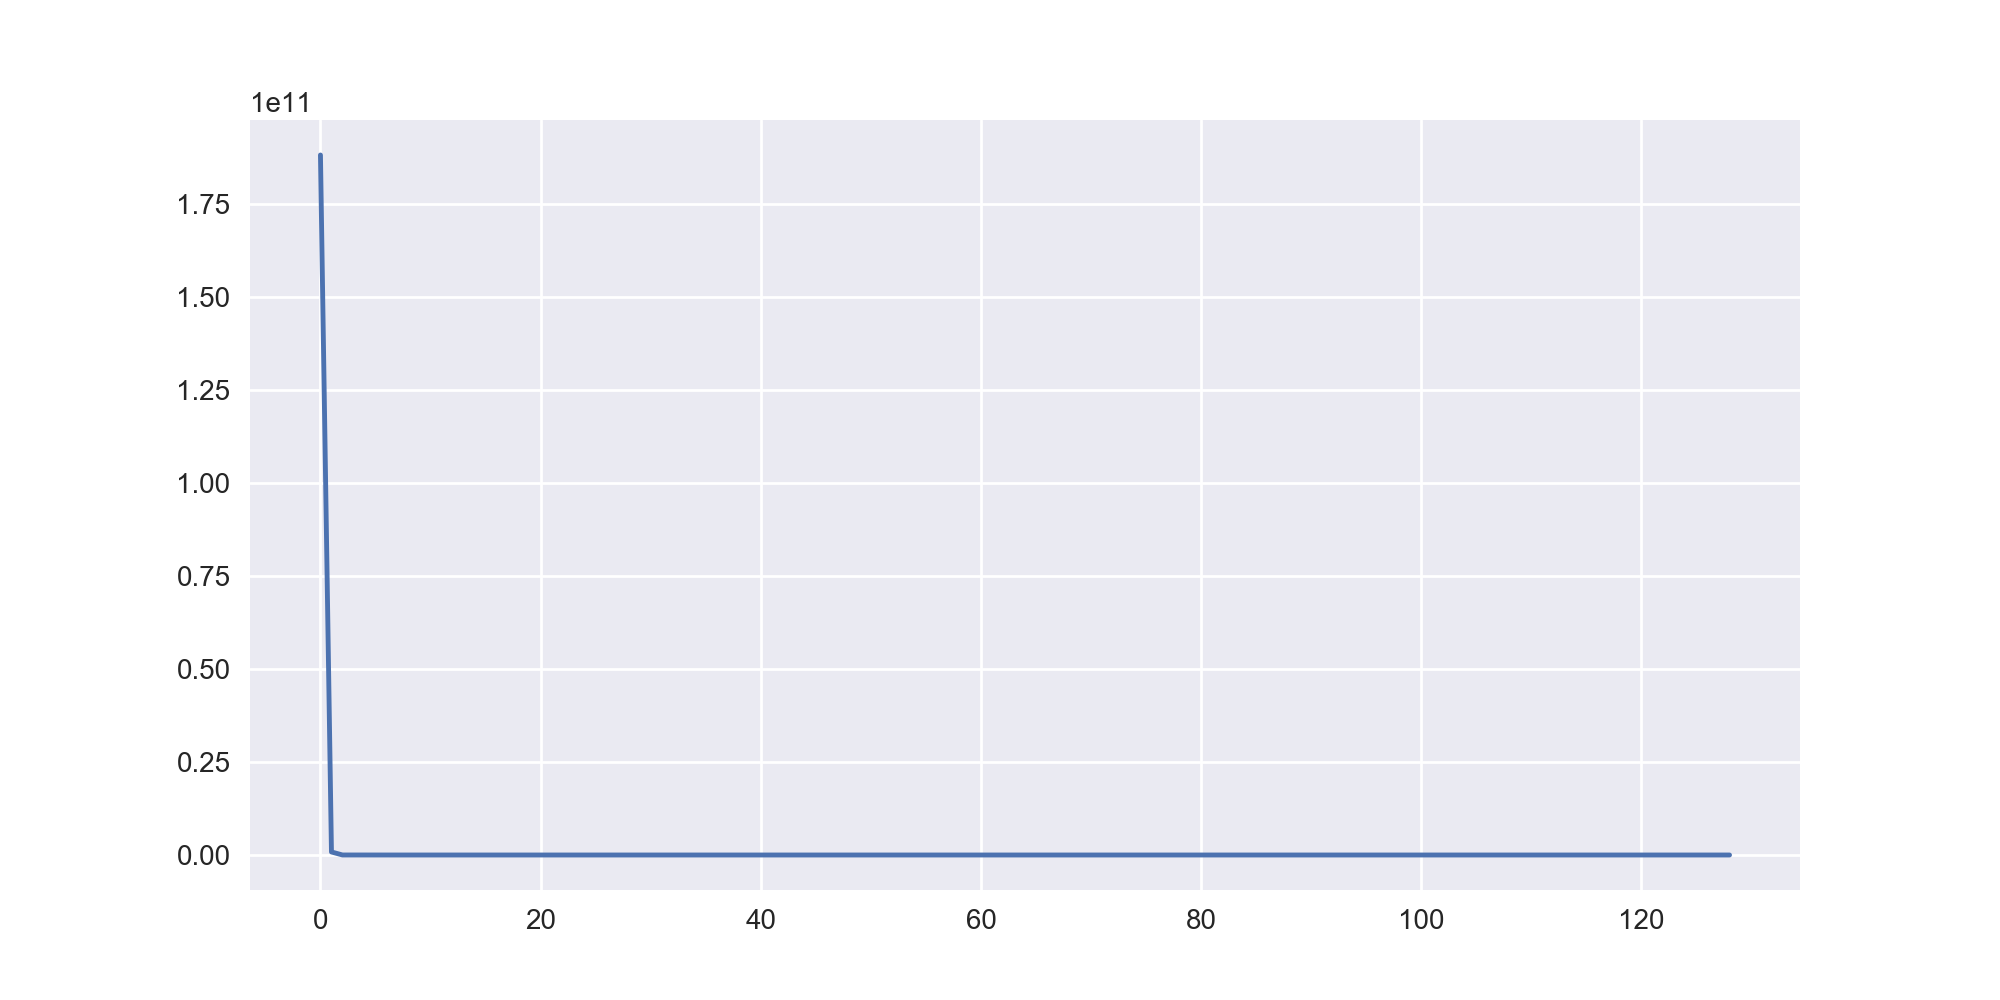

In [94]:
plt.figure(figsize=(10,5))
plt.plot(channel, m_rmf)


In [45]:
m_rmf

array([  1.88308151e+11,   8.18024596e+08,   7.45745070e+06,
         1.49159577e+04,   2.73705436e+01,   2.30264589e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,